# Лабораторная работа 4. Методы поиска.
## Выполнил студент группы БСТ2105 Валишин М.Р.

Реализовать методы поиска в соответствии с заданием. Организовать генерацию начального набора случайных данных. Для всех вариантов добавить реализацию добавления, поиска и удаления элементов. Оценить время работы каждого алгоритма поиска и сравнить его со временем работы стандартной функции поиска, используемой в выбранном языке программирования.

### Задание 1
### Бинарный поиск

In [ ]:
import random
import math
import time
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def BinarySearch(ls: list, value: int) -> int:
    middle = len(ls) // 2
    left = 0
    right = len(ls) - 1
    while left < right and middle != value:
        if value < ls[middle]:
            right = middle - 1
        else:
            left = middle + 1
        middle = (left + right) // 2
    return None if left > right else middle

In [ ]:
n = int(input("Enter length of list: N = "))
ls = [random.randint(1, 100) for _ in range(n)]
ls.sort()
print(ls)
value = int(input("Enter a value to search: "))
print("ID of elem = ", BinarySearch(ls, value))

Enter length of list: N = 10
[3, 5, 19, 24, 37, 38, 38, 39, 50, 53]
Enter a value to search: 38
ID of elem =  6


### Бинарное дерево

In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


class BinaryTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        new_node = Node(value)  # Создание нового узла
        if self.root is None:  # Если дерево пустое
            self.root = new_node  # Новый узел становится корневым
            return
        current = self.root  # Текущий узел - корневой
        while True:
            if value < current.value:  # Если значение меньше значения текущего узла
                if current.left is None:  # Если левый потомок отсутствует
                    current.left = new_node  # Новый узел становится левым потомком текущего узла
                    break
                current = current.left  # Текущим узлом становится левый потомок текущего узла
            else:  # Если значение больше или равно значению текущего узла
                if current.right is None:  # Если правый потомок отсутствует
                    current.right = new_node  # Новый узел становится правым потомком текущего узла
                    break
                current = current.right  # Текущим узлом становится правый потомок текущего узла

    def search(self, value):
        current = self.root  # Текущий узел - корневой
        while True:
            if current is None:  # Если текущий узел отсутствует
                return False  # Узел не найден
            if current.value == value:  # Если значения текущего узла искомого узла равны
                return True  # Узел найден
            elif value < current.value:  # Если значение меньше значения текущего узла
                current = current.left  # Текущим узлом становится левый потомок текущего узла
            else:  # Если значение больше значения текущего узла
                current = current.right  # Текущим узлом становится правый потомок текущего узла
                
    def printTree(self, node):
        if node is None:
            return
        self.printTree(node.left)
        print(node.value)
        self.printTree(node.right)

In [ ]:
tree = BinaryTree()
for i in range(10):
    tree.insert(random.randint(1, 10))
print(tree.search(10))

True


In [ ]:
tree.printTree(tree.root)

1
3
4
4
5
6
8
9
10
10


### Поиск Фибоначчи

In [ ]:
def fibonacci_search(arr, item):
    fib1, fib2 = 0, 1
    fib_sum = fib1 + fib2
    while fib_sum < len(arr):
        fib1 = fib2
        fib2 = fib_sum
        fib_sum = fib1 + fib2

    offset = -1
    while fib_sum > 1:
        i = min(offset + fib1, len(arr) - 1)
        if arr[i] < item:
            fib_sum = fib2
            fib2 = fib1
            fib1 = fib_sum - fib2
            offset = i
        elif arr[i] > item:
            fib_sum = fib1
            fib2 = fib2 - fib1
            fib1 = fib_sum - fib2
        else:
            return i
    if fib2 == 1 and arr[offset + 1] == item:
        return offset + 1
    return None

In [ ]:
n = int(input("Enter N: "))
arr = sorted([random.randint(1, 100) for _ in range(n)])
print(arr)
item = int(input("Enter item: "))
result = fibonacci_search(arr, item)
if result is not None:
    print(f"Element {item} found at index {result}")
else:
    print(f"Element {item} not found")

Enter N: 10
[12, 12, 20, 21, 25, 35, 50, 50, 69, 78]
Enter item: 25
Element 25 found at index 4


### Интерполяционный поиск

In [ ]:
def interpolation_search(arr, item):
    low = 0
    high = len(arr) - 1
    while low <= high and item >= arr[low] and item <= arr[high]:
        pos = low + ((item - arr[low]) * (high - low) // (arr[high] - arr[low]))
        if arr[pos] == item:
            return pos
        elif arr[pos] < item:
            low = pos + 1
        else:
            high = pos - 1
    return None

In [ ]:
n = int(input("Enter N: "))
arr = sorted([random.randint(1, 100) for _ in range(n)])
print(arr)
item = int(input("Enter item: "))
result = interpolation_search(arr, item)
if result is not None:
    print(f"Element {item} found at index {result}")
else:
    print(f"Element {item} not found")

Enter N: 10
[12, 22, 31, 34, 34, 47, 64, 67, 77, 93]
Enter item: 47
Element 47 found at index 5


### Сравнение методов поиска

In [ ]:
arrays, elems = [], []
for i in range(1, 11):
    arrays.append([random.randint(1, 1000*i) for _ in range(1000*i)])
    elems.append(1000*i)

In [ ]:
binary = []
for i in range(len(arrays)):
    start = time.perf_counter()
    array = sorted(arrays[i])
    res = BinarySearch(array, 999*i+1)
    end = time.perf_counter()
    print(1000*(i+1), "элементов: ", round(end-start, 6), "cекунд")
    binary.append(end-start)

1000 элементов:  0.000172 cекунд
2000 элементов:  0.000396 cекунд
3000 элементов:  0.000618 cекунд
4000 элементов:  0.000766 cекунд
5000 элементов:  0.000992 cекунд
6000 элементов:  0.001225 cекунд
7000 элементов:  0.001496 cекунд
8000 элементов:  0.001682 cекунд
9000 элементов:  0.001616 cекунд
10000 элементов:  0.001699 cекунд


In [ ]:
binarytree = []
for i in range(len(arrays)):
    tree = BinaryTree()
    for elem in arrays[i]:
        tree.insert(elem)
    start = time.perf_counter()
    res = tree.search(999*i+1)
    end = time.perf_counter()
    print(1000*(i+1), "элементов: ", round(end-start, 6), "cекунд")
    binarytree.append(end-start)

1000 элементов:  8e-06 cекунд
2000 элементов:  1.2e-05 cекунд
3000 элементов:  1.1e-05 cекунд
4000 элементов:  1.3e-05 cекунд
5000 элементов:  1.4e-05 cекунд
6000 элементов:  1.4e-05 cекунд
7000 элементов:  1.5e-05 cекунд
8000 элементов:  1.4e-05 cекунд
9000 элементов:  1.4e-05 cекунд
10000 элементов:  1.1e-05 cекунд


In [ ]:
fibonacci = []
for i in range(len(arrays)):
    start = time.perf_counter()
    array = sorted(arrays[i])
    res = fibonacci_search(array, 999*i+1)
    end = time.perf_counter()
    print(1000*(i+1), "элементов: ", round(end-start, 6), "cекунд")
    fibonacci.append(end-start)

1000 элементов:  0.000173 cекунд
2000 элементов:  0.000332 cекунд
3000 элементов:  0.000545 cекунд
4000 элементов:  0.000745 cекунд
5000 элементов:  0.000986 cекунд
6000 элементов:  0.00116 cекунд
7000 элементов:  0.001475 cекунд
8000 элементов:  0.001624 cекунд
9000 элементов:  0.001906 cекунд
10000 элементов:  0.002142 cекунд


In [ ]:
interpol = []
for i in range(len(arrays)):
    start = time.perf_counter()
    array = sorted(arrays[i])
    res = interpolation_search(array, 999*i+1)
    end = time.perf_counter()
    print(1000*(i+1), "элементов: ", round(end-start, 6), "cекунд")
    interpol.append(end-start)

1000 элементов:  0.000176 cекунд
2000 элементов:  0.000333 cекунд
3000 элементов:  0.000574 cекунд
4000 элементов:  0.000744 cекунд
5000 элементов:  0.000937 cекунд
6000 элементов:  0.00119 cекунд
7000 элементов:  0.001364 cекунд
8000 элементов:  0.001693 cекунд
9000 элементов:  0.001763 cекунд
10000 элементов:  0.001656 cекунд


In [ ]:
python = []
for i in range(len(arrays)):
    start = time.perf_counter()
    array = sorted(arrays[i])
    try:
        array.index(999*i+1)
    except ValueError:
        pass
    end = time.perf_counter()
    print(1000*(i+1), "элементов: ", round(end-start, 6), "cекунд")
    python.append(end-start)

1000 элементов:  0.000157 cекунд
2000 элементов:  0.000352 cекунд
3000 элементов:  0.000591 cекунд
4000 элементов:  0.000798 cекунд
5000 элементов:  0.001094 cекунд
6000 элементов:  0.001385 cекунд
7000 элементов:  0.002091 cекунд
8000 элементов:  0.001913 cекунд
9000 элементов:  0.001596 cекунд
10000 элементов:  0.001738 cекунд


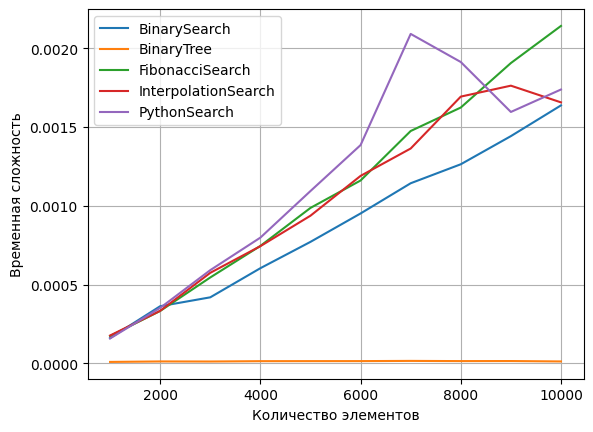

In [ ]:
#общий график - сравнение алгоритмов
plt.xlabel('Количество элементов')
plt.ylabel('Временная сложность')
plt.plot(elems, binary, label ='BinarySearch')
plt.plot(elems, binarytree, label ='BinaryTree')
plt.plot(elems, fibonacci, label ='FibonacciSearch')
plt.plot(elems, interpol, label ='InterpolationSearch')
plt.plot(elems, python, label ='PythonSearch')
plt.grid()
plt.legend()
plt.show()

In [ ]:
df = pd.DataFrame({'BinarySearch': [binary[i] for i in range(10)],
                   'BinaryTree': [binarytree[i] for i in range(10)],
                   'FibonacciSearch': [fibonacci[i] for i in range(10)],
                   'InterpolationSearch': [interpol[i] for i in range(10)],
                   'PythonSearch': [python[i] for i in range(10)]}, index=elems).round(6)

df

,BinarySearch,BinaryTree,FibonacciSearch,InterpolationSearch,PythonSearch
1000,0.000220,0.000004,0.000244,0.000205,0.000227
2000,0.000250,0.000006,0.000279,0.000250,0.000271
3000,0.000402,0.000006,0.000433,0.000405,0.000426
4000,0.000589,0.000005,0.000593,0.000574,0.000651
5000,0.000693,0.000006,0.000729,0.000686,0.000817
6000,0.000869,0.000007,0.000904,0.000836,0.000993
7000,0.001015,0.000005,0.000978,0.000963,0.001178
8000,0.001113,0.000007,0.001233,0.001109,0.001266
9000,0.001480,0.000006,0.001282,0.001255,0.001593
10000,0.001554,0.000004,0.001494,0.001638,0.001668


### Задание 2
### Простое рехэширование

In [ ]:
def hash_generate(key):
    return key % 6

def insert(key, value):
    index = hash_generate(key)
    while index in hash_table:
        index = (index + 1) % 5
    hash_table[index] = value

In [ ]:
hash_table = {}
insert(1, 2)
insert(2, 0)
insert(4, 4)
insert(11, 3)
insert(11, 7)
print(hash_table)

{1: 2, 2: 0, 4: 4, 5: 3, 3: 7}


### Рехэширование с псевдослучайными числами

In [ ]:
def RandomHash(numbers: list) -> list:
    # Создаем новый список для хранения перехешированных чисел
    new_numbers = []
    # Перебираем числа из исходного списка
    for number in numbers:
        # Генерируем псевдослучайное число в диапазоне от 0 до 100
        random_number = random.randint(0, 100)
        # Перехешируем число с помощью псевдослучайного числа
        hashed_number = (number * random_number) % 101
        # Добавляем перехешированное число в новый список
        new_numbers.append(hashed_number)
    return new_numbers

In [ ]:
n = int(input("Enter N: "))
# Создаем список чисел
numbers = [random.randint(1, 100) for _ in range(n)]
# Выводим исходный список и список перехешированных чисел
print("Исходный список чисел:", numbers)
print("Перехешированный список чисел:", RandomHash(numbers))

Enter N: 10
Исходный список чисел: [7, 95, 61, 25, 13, 2, 20, 73, 67, 82]
Перехешированный список чисел: [100, 51, 62, 51, 44, 90, 72, 22, 65, 13]


### Метод цепочек

In [ ]:
# Метод цепочек - это метод решения коллизий в хэш-таблицах.
# Он основан на создании связанных списков (цепочек) элементов,
# которые имеют одинаковый хэш-код.
# Создаем класс узла списка
class HashNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None


# Создаем класс хэш-таблицы
class HashTable:
    def __init__(self):
        self.capacity = 10  # начальная емкость таблицы
        self.size = 0  # количество элементов в таблице
        self.buckets = [None] * self.capacity  # создаем пустые списки для каждой ячейки таблицы

    # Метод добавления элемента в таблицу
    def add(self, key, value):
        index = hash(key) % self.capacity  # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index]  # получаем список (цепочку) элементов по индексу
        while node:  # проходим по всем элементам цепочки
            if node.key == key:  # если ключ уже есть в таблице, обновляем значение
                node.value = value
                return
            node = node.next
        # если ключа нет в таблице, добавляем его в начало цепочки
        new_node = HashNode(key, value)
        new_node.next = self.buckets[index]
        self.buckets[index] = new_node
        self.size += 1
        # если количество элементов превысило 70% от емкости таблицы, увеличиваем емкость вдвое
        if self.size > 0.7 * self.capacity:
            self.resize()

    # Метод получения значения по ключу
    def get(self, key):
        index = hash(key) % self.capacity  # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index]  # получаем список (цепочку) элементов по индексу
        while node:  # проходим по всем элементам цепочки
            if node.key == key:  # если ключ найден, возвращаем его значение
                return node.value
            node = node.next
        # если ключ не найден, возвращаем None
        return None

    # Метод удаления элемента из таблицы
    def remove(self, key):
        index = hash(key) % self.capacity  # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index]  # получаем список (цепочку) элементов по индексу
        prev = None
        while node:  # проходим по всем элементам цепочки
            if node.key == key:  # если ключ найден, удаляем элемент
                if prev:
                    prev.next = node.next
                else:
                    self.buckets[index] = node.next
                self.size -= 1
                return
            prev = node
            node = node.next

    # Метод изменения емкости таблицы
    def resize(self):
        new_capacity = self.capacity * 2  # увеличиваем емкость вдвое
        new_buckets = [None] * new_capacity  # создаем новую таблицу с увеличенной емкостью
        # перехешируем все элементы из старой таблицы в новую
        for i in range(self.capacity):
            node = self.buckets[i]
            while node:
                index = hash(node.key) % new_capacity
                if new_buckets[index]:
                    new_node = new_buckets[index]
                    while new_node.next:
                        new_node = new_node.next
                    new_node.next = HashNode(node.key, node.value)
                else:
                    new_buckets[index] = HashNode(node.key, node.value)
                node = node.next
        self.capacity = new_capacity
        self.buckets = new_buckets

In [ ]:
ht = HashTable()
ht.add('key1', 'value1')
ht.add('key2', 'value2')
ht.add('key3', 'value3')
ht.add('key4', 'value4')
ht.add('key5', 1)
ht.add('key6', 2)
print(ht.get('key1')) # 'value1'
ht.remove('key3')
print(ht.get('key3')) # None
print(ht.get('key5')) # 1
print(ht.get('key6')) # 2

value1
None
1
2


### Задание 3
Расставить на стандартной 64-клеточной шахматной доске 8 ферзей так, чтобы ни один из них не находился под боем другого». Подразумевается, что ферзь бьёт все клетки, расположенные по вертикалям, горизонталям и обеим диагоналям

In [ ]:
class Queen:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def attack(self, queen) -> bool:
        return self.x == queen.x or self.y == queen.y or abs(queen.x - self.x) == abs(queen.y - self.y)

    def getCoord(self):
        return (self.x, self.y)


def SolveQueens(boardSize: int, queens: list = None):
    if queens is None:
        queens = [Queen(0, random.randint(0, boardSize - 1))]

    if len(queens) == boardSize:
        res = []
        for queen in queens:
            res.append(queen.getCoord())
        return res
    else:
        row = len(queens)
        candidates = [Queen(row, i) for i in range(boardSize)]
        for candidate in candidates:
            under_attack = False
            for queen in queens:
                if queen.attack(candidate):
                    under_attack = True
                    break
            if not under_attack:
                queens.append(candidate)
                result = SolveQueens(boardSize, queens)
                if result is not None:
                    return result
                queens.pop()
        return None


def Draw(placement):
    boardSize = len(placement)
    for x in range(boardSize):
        for y in range(boardSize):
            if (x, y) in placement:
                print("♛", end="")
            else:
                print("▢", end="")
        print()


Draw(SolveQueens(8))

▢♛▢▢▢▢▢▢
▢▢▢♛▢▢▢▢
▢▢▢▢▢♛▢▢
▢▢▢▢▢▢▢♛
▢▢♛▢▢▢▢▢
♛▢▢▢▢▢▢▢
▢▢▢▢▢▢♛▢
▢▢▢▢♛▢▢▢


## Вывод
В ходе данной лабораторной работы были реализованы методы поиска элемента в массиве и определены зависимости времени исполнения алгоритма от числа элементов массива, построен график и сводная таблица. Были реализованы три вида хэширования. Была решена задача с расстановкой ферзей на шахматной доске.